# Import functions in SMatStack 

In [1]:
from SMatStack import *
import obspy
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# Synthetic data

/home/hfang/Public/anaconda3/envs/seis/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


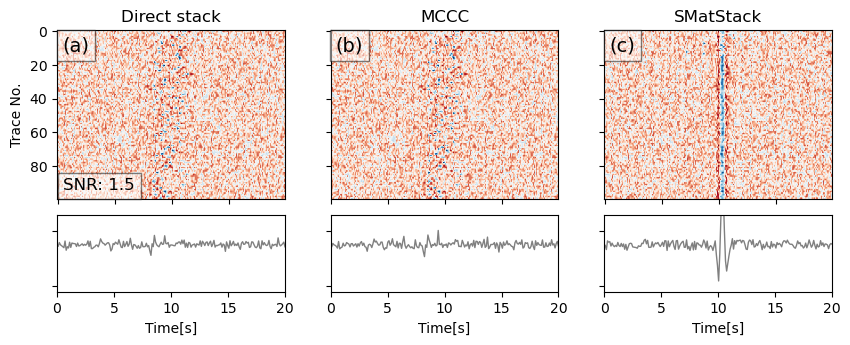

In [2]:
# set up figure
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = plt.GridSpec(ncols=3, nrows=6) 

fig.add_subplot(gs[0:2,0])

# read traces
# strm = obspy.read('synsac_highsnr/*.SAC')
strm = obspy.read('synsac_lowsnr/*.SAC')
npts = strm[0].stats.npts
ntrace = len(strm)
imdata = np.zeros((ntrace,npts))
for ii,itrace in enumerate(strm):
    itrace.stats.distance = ii*1000
    imdata[ii,:] = itrace.data

plt.imshow(imdata,aspect = 'auto', cmap='RdBu')
plt.title('Direct stack')
plt.ylabel('Trace No.')
t = plt.text(4, 12, '(a)', fontsize=14)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
t = plt.text(5, 94, 'SNR: 1.5', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
plt.gca().axes.xaxis.set_ticklabels([])
fig.add_subplot(gs[2,0])
tt = np.linspace(0,20,npts)
data = np.zeros(strm[0].stats.npts,)
for itt in range(len(strm)):
    data += strm[itt].data

plt.plot(tt,data,'gray',linewidth=1.0)
plt.xlim([0,20])
plt.ylim([-10,130])
plt.gca().axes.yaxis.set_ticklabels([])
# plt.gca().axes.xaxis.set_ticklabels([])
plt.xlabel('Time[s]')


align_b = 5
align_a = 15
strmacc,shiftacc2,pol = mcc(strm,align_before=align_b,align_after=align_a,maxiter=200)

strmss,shiftss2 = SMatStack(strm,align_b,align_a,lshift=-40,rshift=40)
fig.add_subplot(gs[0:2,1])
for ii,itrace in enumerate(strmacc):
    itrace.stats.distance = ii*1000
    imdata[ii,:] = itrace.data
plt.imshow(imdata,aspect = 'auto', cmap='RdBu')
plt.title('MCCC')
plt.ylabel('')
plt.gca().axes.yaxis.set_ticklabels([])

t = plt.text(4, 12, '(b)', fontsize=14)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
plt.gca().axes.xaxis.set_ticklabels([])
fig.add_subplot(gs[2,1])
tt = np.linspace(0,20,npts)
# for ii in range(nsample):
data = np.zeros(strm[0].stats.npts,)
# idx = np.random.randint(0,len(stshift),nsubtraces)
for itt in range(len(strmacc)):
    data += strmacc[itt].data
# plt.plot(tt,data,linewidth=1.0)
plt.plot(tt,data,'gray',linewidth=1.0)
plt.xlim([0,20])
# plt.ylim([-25,25])
plt.ylim([-10,130])
plt.gca().axes.yaxis.set_ticklabels([])
# plt.gca().axes.xaxis.set_ticklabels([])
plt.xlabel('Time[s]')
# t = plt.text(1, 80, 'MCCC', fontsize=8)
# t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

fig.add_subplot(gs[0:2,2])
for ii,itrace in enumerate(strmss):
    itrace.stats.distance = ii*1000
    imdata[ii,:] = itrace.data
# strmacc.plot(type='section',time_down=True,orientation='horizontal',fillcolors=('gray','none'),fig=fig);
plt.imshow(imdata,aspect = 'auto', cmap='RdBu')
plt.title('SMatStack')
# strmss.plot(type='section',time_down=True,orientation='horizontal',fillcolors=('gray','none'),fig=fig);
plt.ylabel('')
plt.gca().axes.yaxis.set_ticklabels([])

t = plt.text(4, 12, '(c)', fontsize=14)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
plt.gca().axes.xaxis.set_ticklabels([])
fig.add_subplot(gs[2,2])
tt = np.linspace(0,20,npts)
# for ii in range(nsample):
data = np.zeros(strmss[0].stats.npts,)
# idx = np.random.randint(0,len(stshift),nsubtraces)
for itt in range(len(strmss)):
    data += strmss[itt].data
plt.plot(tt,data,'gray',linewidth=1.0)
plt.xlim([0,20])
# plt.ylim([-10,115])
plt.ylim([-10,130])
plt.gca().axes.yaxis.set_ticklabels([])
# plt.gca().axes.xaxis.set_ticklabels([])
plt.xlabel('Time[s]')

plt.show()

# For field data

EventName, depth, lon, lat: 20160427171416733695 16.36 -13.99 -1.1
trace no.1 1113
trace no.2 1113


/home/hfang/Public/anaconda3/envs/seis/lib/python3.7/site-packages/obspy/core/trace.py:2227: UserWarning: Attempting to normalize by dividing through zero. This is not allowed and the data will thus not be changed.
  warnings.warn(msg)
/home/hfang/Public/anaconda3/envs/seis/lib/python3.7/site-packages/obspy/imaging/waveform.py:285: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  left=fract_x, right=1.0 - fract_x / 2)


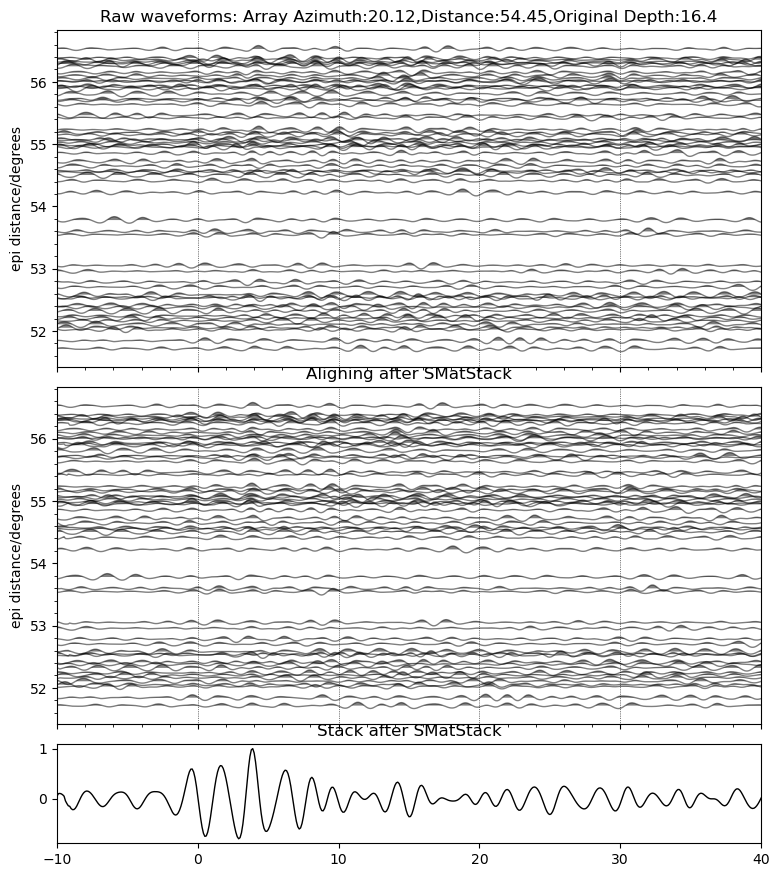

In [3]:
from scipy.stats.mstats import gmean
from obspy.taup import TauPyModel
from mpl_toolkits.basemap import Basemap

mod = TauPyModel(model='ak135')

# for generating subarrays using available stations
ncells = 5000
stationthreshold = 10

trima = 40
trimb = 10

align_b = 5
align_a = 15

lshift = -10
rshift = 10

evdep = 16.36
evlon = -13.99
evlat = -1.10


datadir = './DataExample_Apr27_2016'
phaselistp = ['P','pP','sP']
eventname = '20160427171416733695'

fig = plt.figure(figsize=(8,15),constrained_layout=True)
print('EventName, depth, lon, lat:',eventname,evdep,evlon,evlat)
stall = obspy.read(datadir+'/*.SAC')
print('trace no.1',len(stall))
st_vertical = obspy.core.stream.Stream()
for itrace in stall.copy():
    if not (np.isnan(np.sum(itrace.data))):
        itrace.normalize()
        itrace.stats.starttime=0
        st_vertical.append(itrace)

print('trace no.2',len(stall))

nsta = len(st_vertical)
stapos = np.zeros((nsta,2))
for ii,itrace in enumerate(st_vertical):
    stapos[ii,0] = itrace.stats.sac['stla']
    stapos[ii,1] = itrace.stats.sac['stlo']

cluststaid,aslat,aslon = clustersta(stapos[:,0],stapos[:,1],ncell=ncells,seed=20)

uniqid,uidx,counts = np.unique(cluststaid,return_counts=True,return_index=True)
choosecell = np.where(counts>stationthreshold)[0]
supertraces = obspy.core.stream.Stream()
supertracesacc = obspy.core.stream.Stream()

# choose subarray using cellid 
cellid = [4342]
for icell in cellid:
    strmarray = obspy.core.stream.Stream()
    idx = np.where(cluststaid == icell)[0]
    celllat = stapos[idx,0]
    celllon = stapos[idx,1]
    celllat = 90-celllat
    celllon[celllon<0] += 360
    celllat = gmean(celllat)
    celllat = 90-celllat
    celllon = gmean(celllon)

    distaz = gps2dist_azimuth(evlat, evlon, celllat, celllon, a=6378137.0, f=0.0033528106647474805)
    arr = mod.get_travel_times(source_depth_in_km=evdep,distance_in_degree=distaz[0]/111190.0,\
                               phase_list=phaselistp)
    if len(arr)<1:
        continue

    for ii in idx:
        itrace = st_vertical[ii]
        itrace.stats.distance = itrace.stats.sac['dist']*1000
        strmarray.append(itrace)


    gs = plt.GridSpec(ncols=6, nrows=10) 

    stshift,shiftall = SMatStack(strmarray,align_b,align_a,lshift=lshift,rshift=rshift)

    fig.add_subplot(gs[0:3, :])

    strmarray.plot(type='section',scale=1.0,time_down=True,orientation='horizontal',\
                 recordlength=50,fillcolors=('gray','None'),fig=fig)
    plt.ylabel('epi distance/degrees')
    plt.xlabel('')
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.title(f'Raw waveforms: Array Azimuth:{distaz[1]:.2f},Distance:{distaz[0]/111190:.2f},Original Depth:{evdep:.1f}')

    fig.add_subplot(gs[3:6,:])
    stshift.plot(type='section',scale=1.0,time_down=True,orientation='horizontal',\
                 recordlength=50,fillcolors=('gray','None'),fig=fig)
    plt.xlabel('')
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.title('Aligning after SMatStack')
    plt.ylabel('epi distance/degrees')

    fig.add_subplot(gs[6,:])
    npts = itrace.stats.npts
    ntraces = len(stshift)

# random sampling traces for stacking
    nsample = 1
    nsubtraces = int(ntraces*0.8)
    tt = np.linspace(-10,80,npts)
    for ii in range(nsample):
        data = np.zeros(npts,)
        idx = np.random.randint(0,len(stshift),nsubtraces)
        for itt in idx:
            data += stshift[itt].data

    itrace.data = data
    itrace.normalize()
    plt.plot(tt,itrace.data,linewidth=1.0,color='black') 
    plt.title('Stack after SMatStack')
    plt.xlim([-10,40])

plt.show()



# Plot array positions

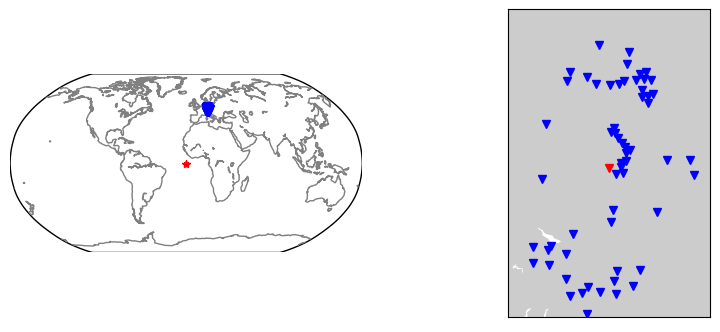

In [4]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
plt.subplot(121)
m = Basemap(projection='robin',lon_0=evlon,resolution='c')
stalat = []
stalon = []
for ii in range(len(strmarray)):
    stalat.append(strmarray[ii].stats.sac['stla'])
    stalon.append(strmarray[ii].stats.sac['stlo'])
stalon = np.array(stalon)
stalat = np.array(stalat)
xsta,ysta = m(stalon,stalat)
xev,yev = m(evlon,evlat)
m.drawcoastlines(color='grey', linewidth=1.0)
m.plot(xsta,ysta,'bv');m.plot(xev,yev,'r*')

plt.subplot(122)
m = Basemap(llcrnrlon=celllon-3.0,llcrnrlat=celllat-3.0,urcrnrlon=celllon+3.0,\
            urcrnrlat=celllat+3.0,\
rsphere=(6378137.00,6356752.3142),\
resolution='i',projection='merc',\
lat_0=40.,lon_0=-20.,lat_ts=20.)

m.fillcontinents()
m.drawstates()
stalon[stalon<0] += 360
xsta,ysta = m(stalon,stalat)
m.plot(xsta,ysta,'bv')
xev,yev = m(celllon,celllat)
m.plot(xev,yev,'rv')
plt.show()